In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
print(x_train.shape)

(25000, 10000)


In [10]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [12]:
original_model_hist = original_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 62ms/step - loss: 0.5977 - acc: 0.6900 - val_loss: 0.3904 - val_acc: 0.8756
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3214 - acc: 0.9045 - val_loss: 0.2979 - val_acc: 0.8888
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2208 - acc: 0.9272 - val_loss: 0.2784 - val_acc: 0.8911
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1777 - acc: 0.9398 - val_loss: 0.2868 - val_acc: 0.8862
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1528 - acc: 0.9499 - val_loss: 0.2977 - val_acc: 0.8834
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1335 - acc: 0.9544 - val_loss: 0.3160 - val_acc: 0.8796
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1135 - acc: 0.9629 - val_loss: 0.3401 - val_acc: 0.8751
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1024 - a

In [32]:
import pandas as pd
histOrigin = pd.DataFrame(original_model_hist.history)
histOrigin['epoch'] = original_model_hist.epoch

In [40]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [42]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 60ms/step - loss: 0.6304 - acc: 0.7421 - val_loss: 0.4246 - val_acc: 0.8800
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3748 - acc: 0.9002 - val_loss: 0.3708 - val_acc: 0.8862
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3146 - acc: 0.9162 - val_loss: 0.3801 - val_acc: 0.8736
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2980 - acc: 0.9180 - val_loss: 0.3551 - val_acc: 0.8858
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2729 - acc: 0.9315 - val_loss: 0.3568 - val_acc: 0.8842
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2670 - acc: 0.9305 - val_loss: 0.3638 - val_acc: 0.8814
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2621 - acc: 0.9331 - val_loss: 0.3586 - val_acc: 0.8826
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2544 - a

In [43]:
import pandas as pd
histL2 = pd.DataFrame(l2_model_hist.history)
histL2['epoch'] = l2_model_hist.epoch

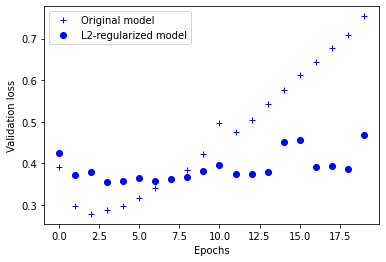

In [44]:
import matplotlib.pyplot as plt

plt.plot(histOrigin['epoch'], histOrigin['val_loss'], 'b+', label='Original model')
plt.plot(histOrigin['epoch'], histL2['val_loss'], 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [46]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.002),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.002),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [47]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 89ms/step - loss: 1.9741 - acc: 0.6687 - val_loss: 0.8442 - val_acc: 0.8244
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.8241 - acc: 0.8090 - val_loss: 0.7858 - val_acc: 0.8234
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.7708 - acc: 0.8255 - val_loss: 0.7355 - val_acc: 0.8445
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.7299 - acc: 0.8428 - val_loss: 0.7263 - val_acc: 0.8341
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.7101 - acc: 0.8443 - val_loss: 0.6985 - val_acc: 0.8472
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.6954 - acc: 0.8427 - val_loss: 0.6765 - val_acc: 0.8531
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.6811 - acc: 0.8497 - val_loss: 0.6778 - val_acc: 0.8508
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.6674 - a

In [48]:
import pandas as pd
histL1 = pd.DataFrame(l1_model_hist.history)
histL1['epoch'] = l1_model_hist.epoch

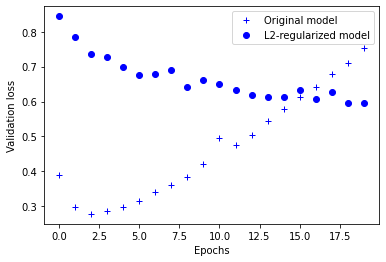

In [50]:
import matplotlib.pyplot as plt

plt.plot(histOrigin['epoch'], histOrigin['val_loss'], 'b+', label='Original model')
plt.plot(histOrigin['epoch'], histL1['val_loss'], 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [52]:
score, acc = l1_model.evaluate(x_test, y_test)
print('Wynik testu: ', score)
print('Trafność testu: ', acc)

782/782 [==============================] - 1s 2ms/step - loss: 0.5969 - acc: 0.8694
Wynik testu:  0.596889853477478
Trafność testu:  0.8694000244140625


In [60]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.7))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.7))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [61]:

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 99ms/step - loss: 0.6882 - acc: 0.5348 - val_loss: 0.5969 - val_acc: 0.7932
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.6086 - acc: 0.6705 - val_loss: 0.5083 - val_acc: 0.8641
Epoch 3/20
49/49 [==============================] - 2s 43ms/step - loss: 0.5442 - acc: 0.7434 - val_loss: 0.4245 - val_acc: 0.8732
Epoch 4/20
49/49 [==============================] - 2s 43ms/step - loss: 0.4997 - acc: 0.7711 - val_loss: 0.3800 - val_acc: 0.8786
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 0.4545 - acc: 0.8026 - val_loss: 0.3500 - val_acc: 0.8788
Epoch 6/20
49/49 [==============================] - 2s 43ms/step - loss: 0.4306 - acc: 0.8175 - val_loss: 0.3244 - val_acc: 0.8800
Epoch 7/20
49/49 [==============================] - 2s 44ms/step - loss: 0.4129 - acc: 0.8326 - val_loss: 0.3247 - val_acc: 0.8790
Epoch 8/20
49/49 [==============================] - 2s 42ms/step - loss: 0.3875 - a

In [62]:
import pandas as pd
histDpt = pd.DataFrame(dpt_model_hist.history)
histDpt['epoch'] = dpt_model_hist.epoch

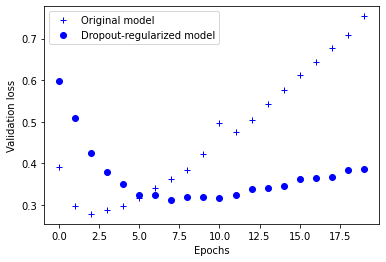

In [63]:
plt.plot(histOrigin['epoch'], histOrigin['val_loss'], 'b+', label='Original model')
plt.plot(histDpt['epoch'], histDpt['val_loss'], 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()